In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

# step 2

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 3/london.csv', sep=',',parse_dates=['timestamp'])
df

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [3]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:

# step 3

# sns.lineplot(x=df.timestamp, y=df.cnt)




In [5]:
# step 4

df_step4 = df.copy()
df_step4 = df_step4.sort_values('timestamp')
df_step4 = df_step4.set_index('timestamp')
df_step4

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
...                         ...         ...     ...  
2017-01-03 19:00:00         0.0         0.0     3.0  
2017-01-03 20:00:00         0.0         0.0     3.0  
2017-01-03 21:00:00         0.0         0.0     3.0  
2017-01-03 22:00:00         0.0         0.0     3.0  
2017-01-03 23:00:00         0.0         0.0     3.0  

[17414 rows x 9 columns]

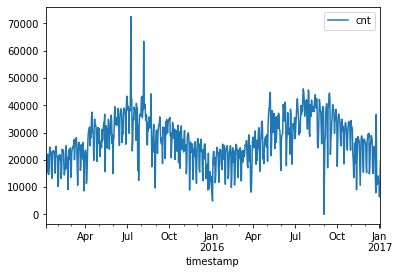

In [6]:
df_step4_final = df_step4.resample(rule='D').agg({'cnt':'sum'})

df_step4_final.plot()

In [7]:
df_step4_final

cnt
timestamp        
2015-01-04   9234
2015-01-05  20372
2015-01-06  20613
2015-01-07  21064
2015-01-08  15601
...           ...
2016-12-30  11566
2016-12-31  11424
2017-01-01   6421
2017-01-02  11823
2017-01-03  19436

[731 rows x 1 columns]

In [8]:
# step 5

#df_step4_final

step5_final = df_step4_final.rolling(window=3).mean()

step5_final

cnt
timestamp               
2015-01-04           NaN
2015-01-05           NaN
2015-01-06  16739.666667
2015-01-07  20683.000000
2015-01-08  19092.666667
...                  ...
2016-12-30  12682.000000
2016-12-31  12347.333333
2017-01-01   9803.666667
2017-01-02   9889.333333
2017-01-03  12560.000000

[731 rows x 1 columns]

In [9]:
step5_final.loc[['2015-07-09']]

cnt
timestamp          
2015-07-09  50705.0

In [10]:
# step 6

step6_df = df_step4_final - step5_final

step6_df

cnt
timestamp              
2015-01-04          NaN
2015-01-05          NaN
2015-01-06  3873.333333
2015-01-07   381.000000
2015-01-08 -3491.666667
...                 ...
2016-12-30 -1116.000000
2016-12-31  -923.333333
2017-01-01 -3382.666667
2017-01-02  1933.666667
2017-01-03  6876.000000

[731 rows x 1 columns]

In [11]:
step6_std = round(np.std(step6_df), 2)

step6_std
step6_std_full = np.std(step6_df).squeeze()

# np.std(step6_df)

In [12]:
# step 7

step7 = step5_final.reset_index().copy().fillna(0)

step7['upper_bound'] = step7.cnt + step6_std_full * 2.576

step7['lower_bound'] = step7.cnt - step6_std_full * 2.576

step7




timestamp           cnt   upper_bound   lower_bound
0   2015-01-04      0.000000  11742.919188 -11742.919188
1   2015-01-05      0.000000  11742.919188 -11742.919188
2   2015-01-06  16739.666667  28482.585854   4996.747479
3   2015-01-07  20683.000000  32425.919188   8940.080812
4   2015-01-08  19092.666667  30835.585854   7349.747479
..         ...           ...           ...           ...
726 2016-12-30  12682.000000  24424.919188    939.080812
727 2016-12-31  12347.333333  24090.252521    604.414146
728 2017-01-01   9803.666667  21546.585854  -1939.252521
729 2017-01-02   9889.333333  21632.252521  -1853.585854
730 2017-01-03  12560.000000  24302.919188    817.080812

[731 rows x 4 columns]

In [13]:
round(step7.iloc[-1].upper_bound, 2)

24302.92

In [27]:
# step 8


step8 = step7.merge(df_step4_final, how = 'inner', on = 'timestamp')

step8
# step8.query("cnt_y > upper_bound").sort_values('cnt_y',ascending=False)

timestamp         cnt_x   upper_bound   lower_bound  cnt_y
0   2015-01-04      0.000000  11742.919188 -11742.919188   9234
1   2015-01-05      0.000000  11742.919188 -11742.919188  20372
2   2015-01-06  16739.666667  28482.585854   4996.747479  20613
3   2015-01-07  20683.000000  32425.919188   8940.080812  21064
4   2015-01-08  19092.666667  30835.585854   7349.747479  15601
..         ...           ...           ...           ...    ...
726 2016-12-30  12682.000000  24424.919188    939.080812  11566
727 2016-12-31  12347.333333  24090.252521    604.414146  11424
728 2017-01-01   9803.666667  21546.585854  -1939.252521   6421
729 2017-01-02   9889.333333  21632.252521  -1853.585854  11823
730 2017-01-03  12560.000000  24302.919188    817.080812  19436

[731 rows x 5 columns]

In [26]:
step8.query("cnt_y > upper_bound").sort_values('cnt_y',ascending=False)

timestamp         cnt_x   upper_bound   lower_bound  cnt_y
186 2015-07-09  50705.000000  62447.919188  38962.080812  72504
214 2015-08-06  46627.333333  58370.252521  34884.414146  63468
721 2016-12-25  19650.666667  31393.585854   7907.747479  36653
609 2016-09-04  14259.000000  26001.919188   2516.080812  27512
1   2015-01-05      0.000000  11742.919188 -11742.919188  20372

In [25]:

step8.query("cnt_y > upper_bound").sort_values('cnt_y',ascending=False).iloc[0].timestamp

Timestamp('2015-07-09 00:00:00')

In [28]:
# step 9

step8.query("cnt_y < lower_bound").sort_values('cnt_y',ascending=False)




timestamp         cnt_x   upper_bound   lower_bound  cnt_y
189 2015-07-12  36036.666667  47779.585854  24293.747479  23240
621 2016-09-16  36193.333333  47936.252521  24450.414146  21967
232 2015-08-24  29529.333333  41272.252521  17786.414146  17400
615 2016-09-10  31262.000000  43004.919188  19519.080812  17080
201 2015-07-24  31013.666667  42756.585854  19270.747479  16034
130 2015-05-14  28709.333333  40452.252521  16966.414146  15609
678 2016-11-12  20878.000000  32620.919188   9135.080812   8990
314 2015-11-14  21037.333333  32780.252521   9294.414146   8898
607 2016-09-02  26086.333333  37829.252521  14343.414146      0